# Práctica Bloque I -- Procesamiento Digital de la Información (PDI) - GITT (URJC) 2015/2016

### Introducción a Statistical Learning

## Authors

### Óscar Barquero Pérez (<oscar.barquero@urjc.es>) y Rebeca Goya Esteban (<rebeca.goyaesteban@urjc.es>)

### Date 11th october 2015

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>. 

## Introducción 

En esta práctica se introducen los conceptos básicos para el desarrollo de una aplicación muy sencilla de statistical learning utilizando el módulo **sklearn** de Python.

Sklearn es un módulo de Python que, según su propia definición es:
* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

La dirección de la página de sklearn es [sklearn]: http://scikit-learn.org/stable/ 

La página de sklearn es un recurso increible para el aprendizaje de los métodos de statistical learning utlizando un aprendizaje basado en ejemplos, mediante la utilización de Python. Recomiendo encarecidamente a los alumnos interesados en este tema que aprovechen toda la documentación de esta página.

El obejitvo de la práctica es que el alumno se familiarice con uno de los métodos de statistical learning más simples: **Regresión Lineal** para la predicción de tráfico web. Durante la práctica el alumno deberá elegir que modelo de regresión lineal utilizar, en concreto el grado del polinomio, para conseguir las mejores prestaciones de predicción. Para ello, se hará enfásis en los conceptos de *overfitting*, *generalization*, *training error*, *test error*, y las técnicas usuales para tratar con estos conceptos, como, *training/test set*, *cross-validation*, *learning curves*.

En esta práctica proponemos una competición al estilo de Kaggle (https://inclass.kaggle.com/), que es una plataforma en la que se establecen competiciones con datos de compañías que quieren resolver un problemad de datos. Los participantes proponen un modelo de análisis de datos y se establece un ranking de los mejores modelos.

A continuación se detalla la estructura del guión de prácticas:
   1. Datos: en esta sección se describen los datos que se utilizarán para la práctica.
   2. Regresión Lineal: en esta sección se hace una breve descripción del modelo de statistical learning que se utilizará en la práctica, así un ejemplo sintético para apreciar los detalles de implementación.
   3. Overfitting & Generalization: en esta sección se describen brevemente los conceptos de overfitting y generalización y como puede afecta a la capacidad de predicción de nuestro modelo.
   4. Cómo evitar el overfitting: en esta sección se enumeran algunas técnicas para realizar la selección final del modelo evitando el fenómeno de overfitting.

## Datos

Los datos que se utilizarán en la práctica corresponden al tráfico web en un determinado servidor de una compañía que ofrece un servicio de Machine Learning via HTTP. La compañía está consiguiendo un gran éxito, lo que acarrea una mayor demanda web de sus servidores. La contrapartida es que la infraestructura del servidor comienza a estar sobrecargada, por lo que la compañía necesita saber cúando será necesario invertir en una nueva infraestructura.

El límite de la infraestructura actual se estima en 100000 request por hora. El objetivo es, con los datos pasados del número de peticiones por hora del servidor, predecir cuándo se llegará a ese límite.

En concreto, el alumno tiene un objetivo doble:
    1. Predecir la fecha en la el servidor recibirá 100000 peticiones por hora.
    2. Estimar el error que comete su modelo en unos datos de test. Este conjunto de test no se proporciona a los alumnos, y únicamente está en posesión de los profesores. Los alumnos subirán un código con el modelo propuesto, que se utilizará para analizar las prestaciones.
    
Los datos se encuentran en formato ".tsv"
<img src="./data.png">

Donde la primera columna representa el número de horas y la segunda columna el número de peticiones al servidor en esa hora.

El primer paso de la práctica implica leer los datos que se encuentran en el archivo de texto y que se almacenarán en vectores de Python. Esto se lleva a cabo en la siguiente líneas de código

In [1]:
%matplotlib inline
import numpy as np

data = np.genfromtxt("web_traffic_train2.txt",delimiter = '\t')

#imprimimos las primeras posiciones de los datos para verifica que hemos leído bien los datos

print(data[0:10,:])

#Verificamos las dimensiones del vector

data.shape

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


(680, 2)

### Ejercicio 1 -- Preprocesado de los datos

Una de las primeras tareas es preprocesar los datos. En este caso concreto, la primera tarea es eliminar los nan (Not a Number) de los vectores. 

El alumno deberá buscar en la ayuda de Numpy (módulo para numerical Python http://www.numpy.org/) la forma de eliminar los nan de la matriz de datos. Al final de este apartado el alumno debe tener dos vectores de dimensiones 724x1, uno de ellos que llamaremos x, contendrá el eje de tiempos; y otro vector llamado y que contendrá el número de peticiones del servidor.

In [2]:
#El alumno debe completar aquí su código para eliminar los nan y separar la matriz de datos en dos vectores x e y 

x = ...
y = ...

SyntaxError: invalid syntax (<ipython-input-2-456d11b716ce>, line 3)

In [3]:
#Versión profesor
x = data[:,0]
y = data[:,1]

x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

print(x.shape)

(672,)


A continuación, lo mejor que uno puede hacer antes de comenzar a realizar el trabajo de verdad es jugar con los datos. Esto aplica a cualquier problema, de PDI, de PDAC, etc. En el caso de statistical learning, el mejor consejo que puedo dar es que pintéis. Es importantísimo visualizar los datos. Así que, manos a la obra.

### Ejercicio 2 -- Representar los datos
En este ejercicio el alumno debe representar los datos del problema con el objeto de tomar un primer contacto sobre como es la esctructura del problema en cuestión. Para ello, el alumnos debería consultar la ayuda del módulo de Matplotlib http://matplotlib.org/, que como casi todos los módulos de Python poseen una documentación valiosísima.

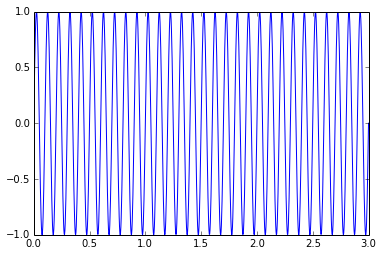

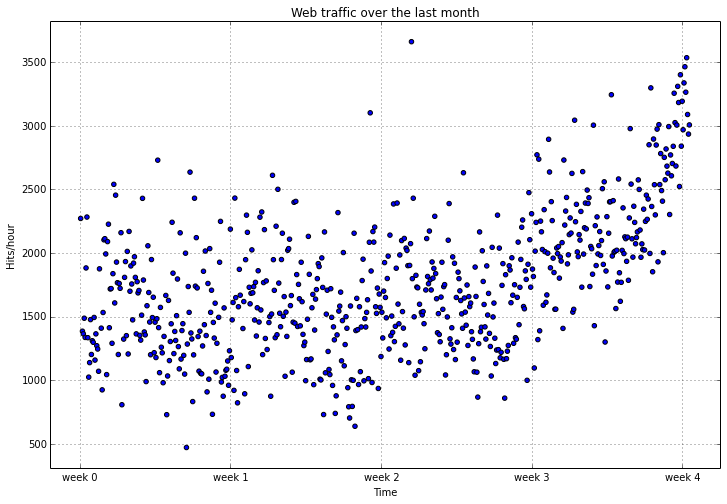

In [4]:
import matplotlib.pyplot as plt

############# Ejemplo para el alumno
xx = np.linspace(0,3,1000)
yy = np.sin(2*np.pi*10*xx)
plt.plot(xx,yy)

##### Esto hay que borrarlo para el alumno
x = data[:,0]
y = data[:,1]
fig = plt.figure()
fig.set_size_inches(12,8)
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight = True)
plt.grid()
##### Esto hay que borrarlo para el alumno

## Regresión Lineal

Uno de los modelos de aprendizaje estadístico más simples, aunque no por ello menos potente, es el modelo de **Regresión Lineal**. 

Como se ha visto en clase de teoría, cuando utilizamos modelos de regresión lineal se asume que el valor de la señal que queremos estimas (predecir), que se conoce como variable respuestas u objetivo, es una combinación lineal de las variables de entrada, también conocidas como variables explicativas. En este caso, el objetivo planteado como un problema de *estimación* es obtener el valor de los coeficientes que multiplican a las variables explicativas, $w_i$. En notación matemática:

$$\hat{y}= w_0 + w_1 x_1 + ... + w_p x_p = \mathbf{w^{T}x}$$

Nomenclatura: los coeficientes $w_i$ se conocen también como pesos; es común que al coeficiencte $w_0$ se le llame *bias*.

En regresión lineal se eligen los coeficientes $\mathbf{w}$ de forma que se minimice el error cuadrático, es decir que el error entre el valor real de $y$ y el proporcionado por nuestro modelo $\hat{y} = \mathbf{w^{T}x}$ sea el menor posible, para todos los valores. Es decir buscamos resolver el siguiente problema de minimización:

$$\underset{w}{min\,} {\left|\left| X w - y\right|\right|_2^2}$$

### Ejercicio 3 -- Primer modelo de regresión lineal en Python-sklearn

A continuación vamos a obtener un model de regresión lineal sencillo con una base de datos de diabetes. El modelo que se propone es:
$$\hat{y} = w_0 + w_1x$$

El alumno debe buscar como proponer el modelo de regresión lineal en la ayuda de sklearn y devolver los valores de los coeficientes, así como el error cuadrático que se comete.

Model parameters: [ 938.23786121  152.91886183]
Mean square error: 3955.02


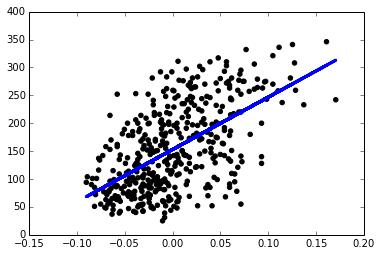

In [5]:
# Ejercicio 3

from sklearn import linear_model

#primero cargamos los datos
data = np.loadtxt("diabetes_ex.csv",delimiter = ',')

#a continuación separamos en x e y 
#####################Esto lo tiene que hacer el alumno
x = data[:,0]
y = data[:,1]

#a continuación creamos el modelo de regresión lineal

#######Esto debe hacerlo el alumno
#reg = linear_model.LinearRegression()
reg = np.polyfit(x,y,1)
regp = np.poly1d(reg)
#ajustamos el modelo a los datos
y_pred = regp(x)

#obtenemos el valor de los coeficientes
#print 'w0 = %.2f'%reg.intercept_,'w1 = %.2f'%reg.coef_[0]
print ("Model parameters: %s" %reg)

print('Mean square error: %.2f' % np.mean((y_pred-y)**2))
#print('Variance score: %.2f' % reg.score(x, y))

plt.scatter(x,y,color = "black")
plt.plot(x,y_pred,linewidth = 3)

## Regresión Lineal con polinomios

Documentación: http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions


El modelo de regresión lineal, tal y como se ha planteado, sólo serviría para resolver problemas en los que la relación entre la variable respuesta y las variables explicativas es lineal, tanto en los coeficientes como en las variables. Cuando existe alguna relación no lineal entre $y$ y las variables explicativas se pude extender sencillamente nuestro modelo de regresión lineal.

Esta extensión es común a muchos algoritmos de aprendizaje estadístico. Esta extensión se consigue construyendo polinomios a partir de las variables explicativas (características). Así, por ejemplo, en un caso con dos variables explicativas, el modelo de regresión lineal básico sería:

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2$$

Si el resutado no es un plano, sino que es un paraboloide, se puede plantear la siguiente extensión a polinomios de segundo orden:

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

El alumno que observa por primera vez esta extensión suele pensar que ya no tratamos con un modelo lineal, pero en este punto se debe hacer notar que la linealidad está en los coeficientes, y el modelo se convierte en completamente lineal por el simple expediente de un cambio de variable:

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

Este cambio de variable nos permite reescribir el modelo de regresión lineal como:

$$\hat{y} = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

Como se puede observar este modelo de regresión es de la misma forma que los que hemos resuelto hasta ahora, y por lo tanto se puede resolver con las mismas técnicas. Considerando potencias más elevadas se pueden obtener modelos con una flexibilidad mucho mayor, es decir, se pueden resolver problemas en los que la relación entre la variable respuesta y las explicativas es muy compleja. Sin embargo, se corre un grave riesgo aumentando la complejidad del modelo (en este caso la complejidad es equivalente al mayor orden de polinomio), puesto que aumentamos la probabilidad de que el modelo **sobreajuste**. Más sobre esto en próximas secciones.

A continuación se propone ajustar un modelo de regresión lineal con bases no lineales.

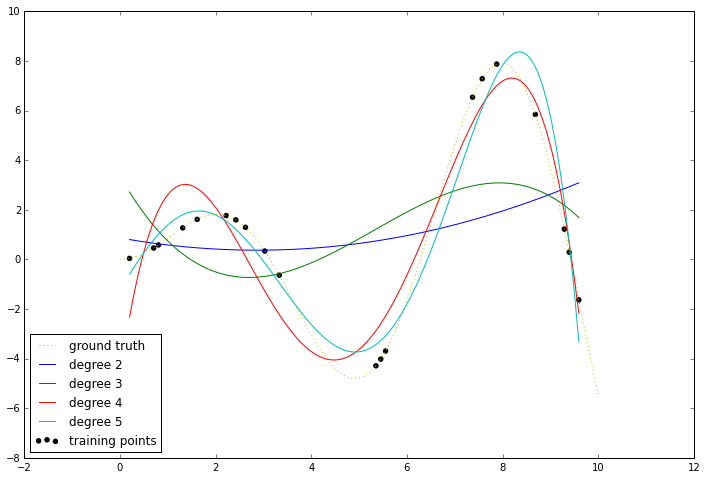

In [6]:
from sklearn.preprocessing import PolynomialFeatures
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

fig = plt.figure()
fig.set_size_inches(12,8)
plt.plot(x_plot, f(x_plot), 'y:',label="ground truth")
plt.scatter(x, y, label="training points",color = 'black')

for degree in [2,3, 4, 5]:
    reg = np.polyfit(x,y,degree)
    regp = np.poly1d(reg)
    xx = np.linspace(x[0],x[-1],100)
    y_plot = regp(xx)
    plt.plot(xx, y_plot, label="degree %d" % degree)

plt.legend(loc='lower left')

### Ejercicio 4. Ajustar un modelo de regresión lineal con los datos  de tráfico en el servidor
El alumno, que ya tendrá algo más de familiaridad con la creación de modelos de regresión lineal, debe ajustar un modelo de regresión lineal a los datos reales con los que planteamos el problema, esto es con los datos de tráfico en el servidor.

Como habrá podido observar el alumno, la relación entre el número de peticiones por hora y la variable explicativa tiempo es no lineal.

Se sugiere probar con un número diferente de grados del polinomio [2,3,4,5,6,7,8,9,10,50,100]. Compruebe cuál es el error cuadrático medio y la varianza explicada para cada grado del polinomio. En última instancia genera una gráfica en la que el eje de abcisas sea el grado del polinomio (es decir, complejidad del modelo) y el eje de ordenadas sea el error cuadrático medio.

('Degree:', 2, 'Mean square error: 174053.43')
('Degree:', 3, 'Mean square error: 167557.51')
('Degree:', 4, 'Mean square error: 165969.69')
('Degree:', 5, 'Mean square error: 165709.44')
('Degree:', 6, 'Mean square error: 165458.49')
('Degree:', 7, 'Mean square error: 162012.70')
('Degree:', 8, 'Mean square error: 161902.80')
('Degree:', 9, 'Mean square error: 160991.62')
('Degree:', 10, 'Mean square error: 160441.31')
('Degree:', 50, 'Mean square error: 145855.76')
('Degree:', 60, 'Mean square error: 145854.26')
('Degree:', 100, 'Mean square error: 145854.26')


/usr/lib/python2.7/dist-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/lib/python2.7/dist-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/lib/python2.7/dist-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


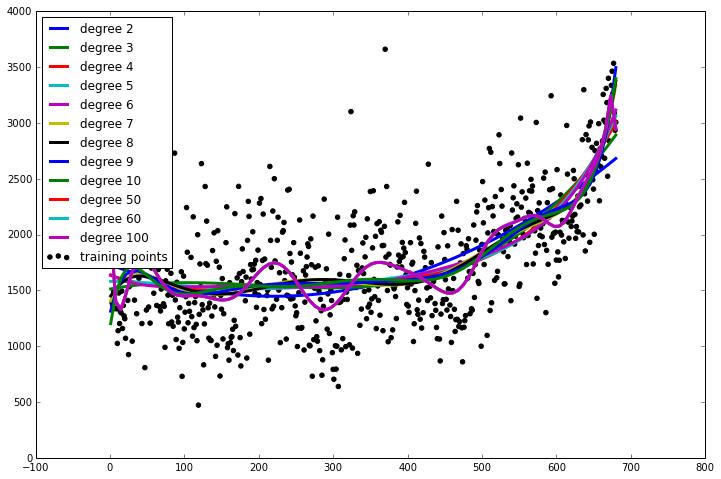

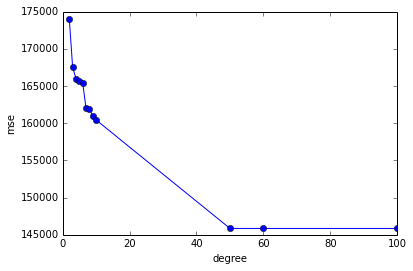

In [9]:
###Esto es para que lo haga el alumno

data = np.genfromtxt("web_traffic_train2.txt",delimiter = '\t')
#Versión profesor
x = data[:,0]
y = data[:,1]


x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

#create a matrix version
X = x[:, np.newaxis]
fig = plt.figure()
fig.set_size_inches(12,8)
plt.scatter(x, y, label="training points",color = 'black')

#guardar los resultados
mse = []
vs = []
for degree in [2, 3, 4, 5,6,7,8,9,10,50,60,100]:
    reg = np.polyfit(x,y,degree)
    regp = np.poly1d(reg)
    xx = np.linspace(x[0],x[-1],100)
    y_plot = regp(xx)
    plt.plot(xx, y_plot, label="degree %d" % degree,linewidth=3)#
    print('Degree:',degree,'Mean square error: %.2f' % np.mean((regp(x)-y)**2))
    mse.append(np.mean((regp(x)-y)**2))
    #print('Degree:',degree,'Variance score: %.2f' % reg.score(XX, y))
    #vs.append(reg.score(XX, y))
plt.legend(loc='upper left')

degree = [2,3,4,5,6,7,8,9,10,50,60,100]
fig = plt.figure()
plt.plot(degree,mse,'o-')
plt.xlabel('degree')
plt.ylabel('mse')




## Elección del modelo

La elección del modelo se tendría (ojo veremos que esto no es así) que basar en aquel modelo que minimizase el error cuadrático medio. De forma que un alumno, que desconociese el concepto de *generalización* elegiría el modelo con un grado del polinomio de 100, es decir el modelo más complejo de todos los propuestos.

# SOBREAJUSTE Y GENERALIZACIÓN

El problema en aprendizaje estadístico es dados unos datos $(x_i,y_i)$, donde $x_i$ son variables explicativas e $y_i$ es la variable objetivo que yo quiero estimar, o predecir, proponer un modelo que aprenda de los datos. De esta forma, cuando le presentemos al modelo unos datos $x_j$, el modelo sea capaz de producir una respuesta $\hat{y}_i$ que sea los más parecida posible a $y_j$.

*El siguiente párrafo es el más importante de esta práctica.*

El objetivo final del apendizaje estadístico es propocionar modelos que sean capaces de estimar bien, predecir bien, clasificar bien, en datos nuevo que nunca haya visto. Hacerlo bien, es decir que nuestro modelo se equivoque poco en los datos que ya teníamos para entrenar el modelo no quiere decir que lo vaya a hacer bien en los datos nuevos.

No tiene interés hacerlo bien en los datos de entrenamiento. ¡Ya conocemos la respuesta en estos! Lo importante es utilizar sabiamente estos datos para hacerlo bien con datos que no disponemos.

Esto presenta una aparente paradoja. ¿Dónde encontramos datos que nunca hayamos visto? Una forma inteligente de proceder es partir nuestros conjunto de datos en dos: (1) un porcentaje de los datos los usaremos para entrenar el modelo (*training*), (2) otro conjunto será de datos que usaremos sólo para ver que tal se comporta nuestro modelo con datos que nunca antes vió (*test*).

Cuando nuestro modelo se comporta bien con datos que nunca antes ha visto, se dice que *generaliza* bien. Cuando nuestro modelo es capaz de comportarse extremadamient bien con los datos de entrenamiento, se dice que *sobreajusta*. 

## Training/Test set

En esta sección veremos una forma de resolver el problema de sobreajuste. En el ejercicio 4, se ha visto que con un grado del polinomio de 100 el modelo proporciona el menor error en los datos de entrenamiento. Visualmente, se puede apreciar que el modelo está *sobreajustándose* a los datos. El mecanismo que proponomos aquí para solventar este problema es partir el conjunto de entramiento en dos partes, una que sólo se utilice en entramiento y otro que se utilice para calcular el error que comente nuestro modelo. La información sobre este particular http://scikit-learn.org/stable/modules/cross_validation.html.

### Ejercicio 5 evaluación de error en conjunto test

En este ejercicio el alumno deberá partir el conjunto de datos en dos subconjuntos, uno de training y otro de test. Y procederá igual que en el ejercicio 4; para la elección del modelo que ofrece menor MSE.

('Degree:', 2, 'Mean square error: 190019.86')
('Degree:', 3, 'Mean square error: 179688.31')
('Degree:', 4, 'Mean square error: 177623.05')
('Degree:', 5, 'Mean square error: 180636.59')
('Degree:', 6, 'Mean square error: 180307.00')
('Degree:', 7, 'Mean square error: 179644.91')
('Degree:', 8, 'Mean square error: 179744.38')
('Degree:', 9, 'Mean square error: 180186.07')
('Degree:', 10, 'Mean square error: 181381.04')
('Degree:', 50, 'Mean square error: 175298.82')
('Degree:', 60, 'Mean square error: 175167.00')
('Degree:', 100, 'Mean square error: 175167.31')


/usr/lib/python2.7/dist-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/lib/python2.7/dist-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/lib/python2.7/dist-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


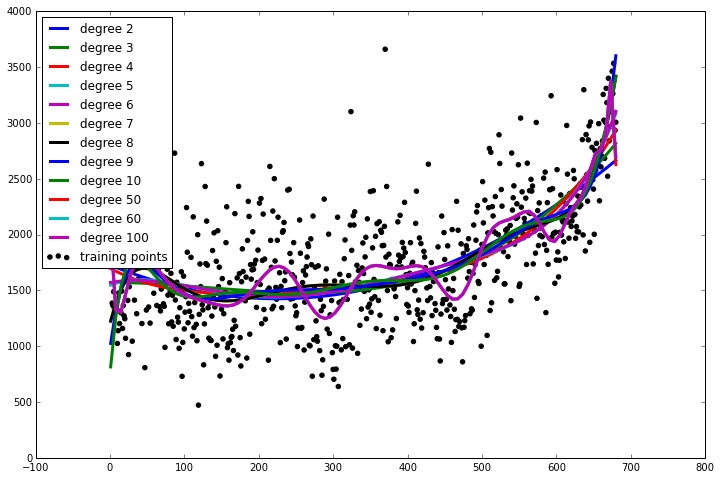

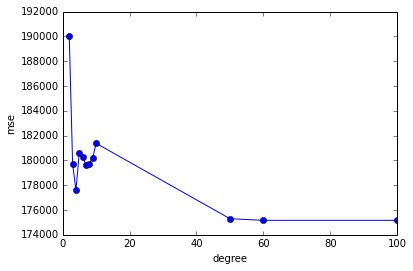

In [10]:
from sklearn import cross_validation

###Esto debe crearlo el alumno
#generacion de training y test set
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y, test_size=0.4, random_state=0)

#Ahora hay que proceder igual que anteriormente, pero evaluando el modelo con el conjunto de test
fig = plt.figure()
fig.set_size_inches(12,8)
plt.scatter(x, y, label="training points",color = 'black')

#guardar los resultados
mse = []

for degree in [2, 3, 4, 5,6,7,8,9,10,50,60,100]:
    reg = np.polyfit(x_train,y_train,degree)
    regp = np.poly1d(reg)
    xx = np.linspace(x[0],x[-1],100)
    y_plot = regp(xx)
    plt.plot(xx, y_plot, label="degree %d" % degree,linewidth=3)#
    print('Degree:',degree,'Mean square error: %.2f' % np.mean((regp(x_test)-y_test)**2))
    mse.append(np.mean((regp(x_test)-y_test)**2))
    #print('Degree:',degree,'Variance score: %.2f' % reg.score(XX, y))
    #vs.append(reg.score(XX, y))
plt.legend(loc='upper left')

degree = [2,3,4,5,6,7,8,9,10,50,60,100]
fig = plt.figure()
plt.plot(degree,mse,'o-')
plt.xlabel('degree')
plt.ylabel('mse')

## Cross-validation k-fold
Una duda que nos puede surgir con la anterior técnica es que estamos desaprovechando un número elevado de datos para realizar el entrenamiento. Si conseguir datos es costoso (caro, o difícil), parece que utilizar otro tipo de estrategia que no descarte tantos datos para evaluación del modelo sería deseable.

Aquí se introduce otra técnica conocida como cross-validation k-fold. En su aproximación más simple, el conjunto de entrenamiento se divide en k (de ahí k-fold) subconjuntos. A continuación se realiza el siguiente procedimiento para cada uno de los k-"folds":
1. Nuestro modelo se entrena utilizando k-1 subconjuntos como conjunto de entrenamiento;
2. El resultado del modelo es validado en el subconjunto restante (que será el conjunto de test para esta iteración).

El resultado final del modelo será el promedio de los k resultados en los conjunto de test de cada iteración.

La información sobre este particular se puede consultar en http://scikit-learn.org/stable/modules/cross_validation.html

### Ejercicio 6 Evaluación del modelo utilizando cross-validation k-fold

El objetivo del alumno es repetir la validación de nuestro modelo para la elección del grado del polinomio utilizando cross-validation k-fold.

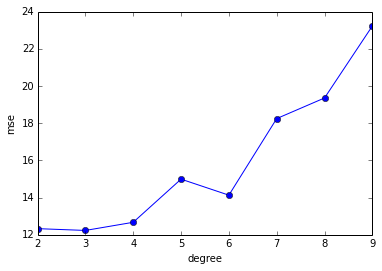

In [11]:
from sklearn import cross_validation

###Esto debe crearlo el alumno
#generacion de training y test set
k_fold = cross_validation.KFold(len(x[:]),n_folds = 5)

#Ahora hay que proceder igual que anteriormente, pero evaluando el modelo con el conjunto de test

#guardar los resultados
mse_k = []

for degree in [2, 3, 4, 5,6,7,8,9]:
    mse = []
    for i_train,i_test in k_fold:
        reg = np.polyfit(x[i_train],y[i_train],degree)
        regp = np.poly1d(reg)
        #xx = np.linspace(x[0],x[-1],100)
        #y_plot = regp(xx)
        #plt.plot(xx, y_plot, label="degree %d" % degree,linewidth=3)#
        #print('Degree:',degree,'Mean square error: %.2f' % np.mean((regp(x)-y_test)**2))
        mse.append(np.mean((regp(x[i_test])-y[i_test])**2))
        #print('Degree:',degree,'Variance score: %.2f' % reg.score(XX, y))
        #vs.append(reg.score(XX, y))
        
        
    mse_k.append(np.mean(mse))    
    
degree = [2,3,4,5,6,7,8,9]
fig = plt.figure()
plt.plot(degree,np.log(mse_k),'o-')
plt.xlabel('degree')
plt.ylabel('mse')

## Fin de la práctica

Con esto llegamos al final de la práctica. :(

Los entregables que se pedirán serán:
 1.- Orden del polinomio
 2.- Valores de los coeficientes del polinomio.Se subirá un fichero de texto csv, con una única columna, en el que cada fila corresponderá con el valor del coeficiente ordenado de mayor a menor, es decir: $w_0$,$w_1$,$w_2$ ...
 3.- Con estos coeficientes generaremos un modelo de regersión lineal que calculará el error cuadrático medio para cada grupo.
 
## Opcional

Mi sugerencia, y esto es de verdad lo divertido, es que el alumno investigue los diferentes métodos de regresión lineal que se proponen en sklearn
    1.-) Diferente versiones de regresión lineal: Lasso, Ridge regression, weighted linear regression
    2.-) Métodos más avanzados: knn, support vector machines, random forest, ensemble trees

En la documentación hay infinidad de ejemplos que os permitirá, con lo visto en esta práctica poder utilizar cualquier método anterior, y verificar si se consiguen mejores resultados.